<a href="https://colab.research.google.com/github/Anschoudary/DeepLearning/blob/main/Recurrent_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recurrent Neural Networks**
Recurrent Neural Network(RNN) is a type of Neural Network where the output from the previous step is fed as input to the current step. In traditional neural networks, all the inputs and outputs are independent of each other. Still, in cases when it is required to predict the next word of a sentence, the previous words are required and hence there is a need to remember the previous words. Thus RNN came into existence, which solved this issue with the help of a Hidden Layer. The main and most important feature of RNN is its Hidden state, which remembers some information about a sequence. The state is also referred to as Memory State since it remembers the previous input to the network. It uses the same parameters for each input as it performs the same task on all the inputs or hidden layers to produce the output. This reduces the complexity of parameters, unlike other neural networks.

## Libraries

In [ ]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf


## Loading the data

In [ ]:
# Load the IMDB movie review dataset
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

print(info)

print(train_dataset)
print(test_dataset)


tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir='/root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
    

In [ ]:
# Prepare the data for training
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


## Process data for model input

In [ ]:
# Create a text encoder
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))


## Model

In [ ]:
# Define the RNN model
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])


In [ ]:
# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_vectorization                   │ (None, None)                │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, None, 64)            │          64,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 415,109 (1.58 MB)

 Trainable params: 138,369 (540.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 276,740 (1.06 MB)

## Model training

In [ ]:
# Train the model
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 734s 2s/step - accuracy: 0.5111 - loss: 0.6824 - val_accuracy: 0.7245 - val_loss: 0.5092
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 722s 2s/step - accuracy: 0.7291 - loss: 0.5035 - val_accuracy: 0.8318 - val_loss: 0.3697
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 759s 2s/step - accuracy: 0.8339 - loss: 0.3703 - val_accuracy: 0.8562 - val_loss: 0.3259
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 728s 2s/step - accuracy: 0.8537 - loss: 0.3343 - val_accuracy: 0.8505 - val_loss: 0.3404
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 724s 2s/step - accuracy: 0.8625 - loss: 0.3190 - val_accuracy: 0.8547 - val_loss: 0.3193
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 727s 2s/step - accuracy: 0.8649 - loss: 0.3143 - val_accuracy: 0.8568 - val_loss: 0.3328
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 781s 2s/step - accuracy: 0.8654 - loss: 0.3113 - val_accuracy: 0.8531 - val_loss: 0.3140
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 756s 2s/step - accuracy: 0.8679 - loss: 0.3070 - val_accu

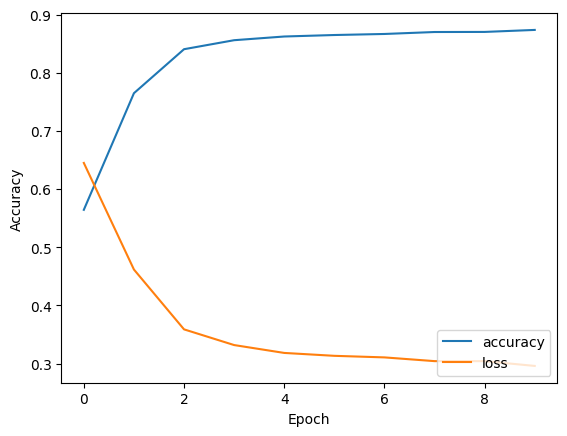

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 ━━━━━━━━━━━━━━━━━━━━ 164s 419ms/step - accuracy: 0.8625 - loss: 0.3184
Test Loss: 0.3170543313026428
Test Accuracy: 0.8619999885559082


## Testing the Model

In [ ]:
import numpy as np

def predict_review(model, review):
    # Preprocess the review (convert to lowercase and strip spaces)
    review = tf.convert_to_tensor([review])

    # Make prediction
    prediction = model.predict(review)

    # Convert logits to probabilities (optional)
    probability = tf.sigmoid(prediction).numpy()[0][0]
    # Determine sentiment: 1 (positive) if prob > 0.5 else 0 (negative)
    sentiment = "Positive" if probability > 0.5 else "Negative"

    return sentiment, probability


In [ ]:
review_text = "This is a great movie, recommended for every one!"
sentiment, probability = predict_review(model, review_text)
print(f"Sentiment: {sentiment}, Probability: {probability:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Sentiment: Positive, Probability: 0.5029
